# VAE Network to find Latent Variables for PPDs - SOURCE CODE

    This notebook is used to train a VAE Neural Network to find the latent variables of a large 
    dataset of Proto-planetary Disk images (obtained from the FARGO3D simulations), and to find 
    the correlation of those latent spaces with physical parameters.

    
    Summary       : We are trying to push the boundaries of a Variational Autoencoder to scoop out 
                    hidden physical parameters within a large dataset of PPD-images, and to observe
                    the effect each of those paraemters will have on the disk images, upto a desired
                    accuracy of 70%.


    Code&Config   : The code is being done on Jupyter Notebook platform, and is being run on MacOS 13.1, 
                    Apple M1, 8gb configuration.  
               
         
________________

### Supervisor   : Dr. Sayantan Auddy
#### Written by    : Dyutiman Santra
#### Created       : 23rd May, 2023

_______________________________________

||  Importing Modules  ||

In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import glob 


from keras import backend as K
from keras.layers import Input, Dense, Conv2D, Conv2DTranspose, Flatten, Lambda, Reshape
from keras.models import Model
from keras.losses import binary_crossentropy
from keras.datasets import mnist



from sklearn.metrics import accuracy_score, precision_score, recall_score

from tensorflow.keras import layers, losses

from numpy import asarray


||  Checking the availbale number of GPUs  ||

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    print("Name:",gpu.name,"Type:",gpu.device_type)
print("TensorFlow version used ",tf.__version__)

Num GPUs Available:  1
Name: /physical_device:GPU:0 Type: GPU
TensorFlow version used  2.10.0


||  Reading DATA  ||

In [4]:
## name of the CSV file

File_Name = "Planet 1 and 3 only, out of 700 - ppd (1).csv"

In [5]:
## Reading the Image Dataset, from specified folders

path = "/Users/Dyutiman/Downloads/Disk_gas_plots 2" #specifying the path of the dataset

x = [] 															# a List to store cropped images
Y = [] 															# a List to store the respective labels 


k=1    
for i in range (1):
    #directory = path+"/RT_A_"+ str(i)+"/*.png" 				# getting the folders' directories
    directory = path+"/*.jpg" 									# getting the folders' directories
    data_set_indiv = glob.glob(directory) 						# a list of all the specific directories of the images
    
    #print(data_set_indiv)
    
    m = 1 														# counter variable, to view progress
    
    for j in data_set_indiv: 									# traversing through the 150 iamges in a folder
        
        a = cv2.imread(j)
        a = cv2.normalize(a, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

        m=m+1
        
        
        image = cv2.resize(a, (500,500)) 						# resizing the images (may be chosen to be any value in 4:3 ratio)
        
        
        if(j.endswith(" 2.jpg") or (j[-7]!='_' and j[-6]!='_' and (int(j[-7:-4])>415 or int(j[-7:-4])==398 or int(j[-7:-4])==399) ) or j[-9]=='_'):
            print(j) 											# viewing each individual directory
        
        
            ## Cropping the images (done twice since we are working with 2 different image sets)
            hello = tf.image.crop_to_bounding_box(
                   image, 55, 105, 345, 345 
                   )                                        
            
            Y.append(1) 										# label for 1st type of image set
            
        else:
            print(j)
        
            hello = tf.image.crop_to_bounding_box(
                   image, 67, 132, 320, 320     
                   )                         
            Y.append(3) 										# label for 2nd type of image set
                
        
        
        ## Storing the images in a List
        hello = tf.image.resize(hello, [300, 300]) 				# universally resized to 300x300
        x.append(hello) 
                        
        #print("folder is {} and images is {}".format(i, m)) 	# viewing the progress (OPTIONAL)

    
    
# Having stored all the necessary images in list 'x', we then convert it to an array
# The images are all COLOURED images
data_col = np.asarray(x)


/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_152 2.jpg
Metal device set to: Apple M1
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_826.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_117 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_198.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_832.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_40 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_253 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_216 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_629.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_601.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_167.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_173.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_615.jpg


2023-05-24 20:15:27.862213: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-24 20:15:27.862357: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_359.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_1103.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_1117.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_365.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_403.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_417.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_371.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_588.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_1088.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_336 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_239.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_373 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_211.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_577.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_563.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_205.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_ga

/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_165.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_603.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_617.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_171.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_159.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_818.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_824.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_830.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_309 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_808.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_194 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_268 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_834.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_820.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_86 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_175.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_ga

/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_1107.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_375.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_79 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_413.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_407.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_297 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_361.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_84 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_196 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_332 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_639.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_377 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_611.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_177.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_163.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_605.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/ga

/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_926.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_153 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_84.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_41 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_53.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_217 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_252 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_729.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_47.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_7.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_701.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_715.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_714.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_396 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_700.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_728.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_6

/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_211 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_254 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_129.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_897.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_349 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_303.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_465.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_1159.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_471.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_317.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_1165.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_459.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_389 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_288.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_277.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_511.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas

/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_265 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_220 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_252.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_199 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_1020.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_1034.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_508.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_285.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_164 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_121 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_291.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_298 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_76 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_33 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_332.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_1168.jpg
/Users/Dyutiman/Downloads/Disk_gas_plot

/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_321.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_309.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_1153.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_1147.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_282.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_296.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_322 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_241.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_527.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_367 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_533.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_255.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_1027.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_1033.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_269.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_94 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_

/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_13 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_492.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_144 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_101 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_486.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_6 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_109.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_135.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_653.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_647.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_121.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_874.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_860.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_358 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_848.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_690.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_ga

/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_181 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_970.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_780.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_93 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_238 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_794.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_11.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_280 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_743.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_39.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_757.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_139 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_38.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_344 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_756.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_301 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas

/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_627.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_364 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_141.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_321 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_155.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_633.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_800.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_814.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_182.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_196.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_828.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_180.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_95 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_194.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_187 2.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_gap_802.jpg
/Users/Dyutiman/Downloads/Disk_gas_plots 2/gas_ga

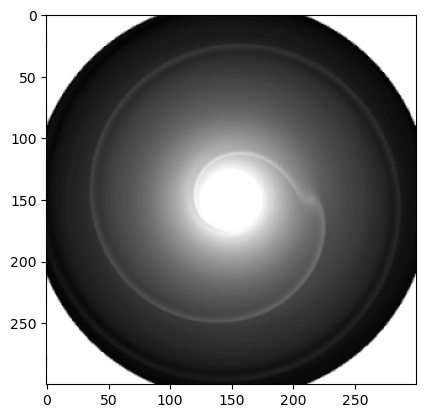

In [13]:
# Progress Check
plt.imshow(data_col[14])

In [14]:
# Converting the images to Grayscale

y = [] 

for i in data_col:
    
    a = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
    y.append(a.reshape(a.shape[0],a.shape[1],1))
    

# Yet again we convert from List to Array
data= np.asarray(y)
print(data.shape)

(1527, 300, 300, 1)


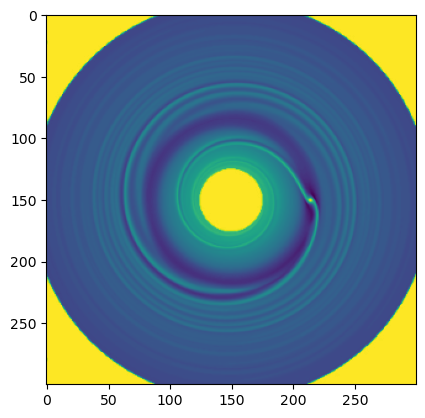

In [15]:
# Progress Check
plt.imshow(data[120])

Setting the Pixel (pxl) and the Batch Size (bs)

In [16]:
pxl = 86
bs  = 150

In [17]:
# Resizing to our desired resolution
resize_image = tf.image.resize(data, [pxl, pxl])

# Storing the data in variable 'data_images' and also storing the size of the dataset
data_images = resize_image.numpy()
data_size = data_images.shape[0]
batch_size = bs

# Setting the Label

The Label is set to any of the required parameters whose effect we would like to reflect in our Latent Space


In [18]:
 
# METHOD 1 : TO DIRECTLY REFLECT THE VALUES

#for i in range (1527):
#        Y.append(1) #(label_1[i]*100000)


# METHOD 2 : ATTEMPT TO NORMALISE THE VARYING RANGES IN THE VALUES TO BETTER REFLECT THEIR EFFECT ON THE LATENT SPACE

'''for i in range (label_1.shape[0]):
    if(label_2[i]!=0):
        for j in range(150):
            Y.append(2)    #1.57
#    elif(label_1[i]==0.0157):
#        for j in range(150):
#            Y.append(2)    #0.0157
#    elif(label_1[i]==0.00523):
#        for j in range(150):
#            Y.append(3)    #0.00523
#    elif(label_1[i]==0.00157):
#        for j in range(150):
#            Y.append(4)    #0.00157
#    elif(label_1[i]==0.000157):
#        for j in range(150):
#            Y.append(5)    #0.000157
    else:
        for j in range(150):
            Y.append(1)'''
    


Y_label=np.asarray(Y)
print(Y_label.size)
Y_label


1527


array([1, 1, 1, ..., 1, 3, 3])

In [19]:
# Checking the number of images and corresponding labels (if any)

print(data_images.shape)
print(Y_label.shape)

(1527, 86, 86, 1)
(1527,)


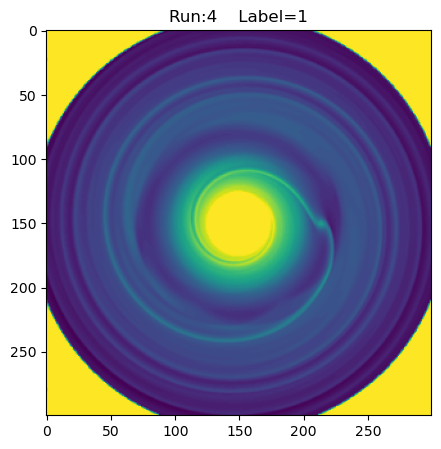

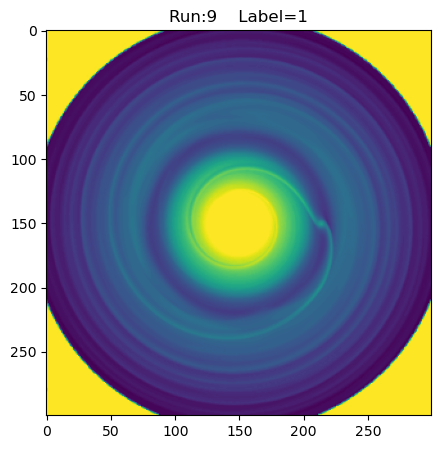

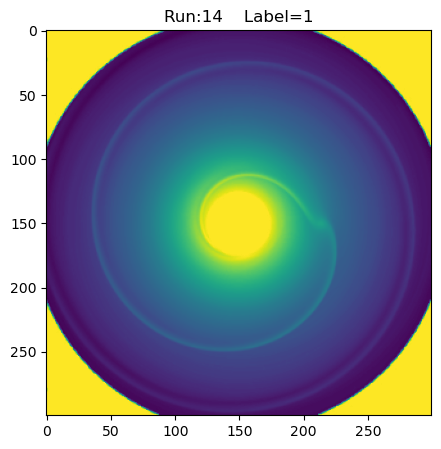

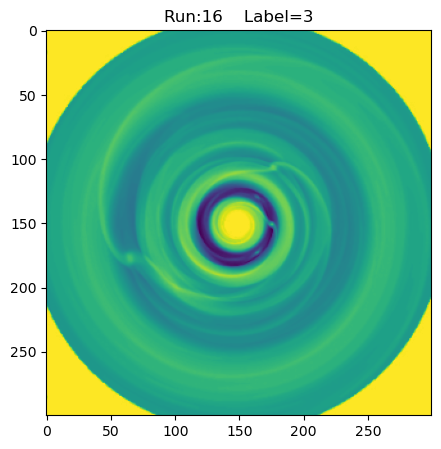

In [20]:
import time
import sys
from IPython import display

fig, axes = plt.subplots(ncols=1, sharex=False,sharey=True, figsize=(15, 5))

k=0

for i in data:
    try:
        axes.set_title("Run:{}    Label={}".format(k, Y_label[k]))
        plt.imshow(i)
        #print(k)
        k=k+1
        display.display(plt.gcf())
        display.clear_output(wait=True)
        time.sleep(0.01)
        if(k%5 == 0):
            fig, axes = plt.subplots(ncols=1, sharex=False,sharey=True, figsize=(15, 5))
    except KeyboardInterrupt:
        break
        

### Splitting the Dataset into Train and Test



We keep the randomness at some fixed state (42)

75% of data is used for Training the network and 25% of data is used for Testing the same

And of course, the data is shuffled to remove bias

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_images, Y_label,
                                   random_state=42, 
                                   test_size=0.25, 
                                   shuffle=True)

In [26]:
# Progress Check
print(y_test[2])

1


In [28]:
# Viewing the dimensions of all the sets

print("The shape of X_train is", X_train.shape)
print("The shape of y_train is", y_train.shape)
print("The shape of X_test  is", X_test.shape)
print("The shape of y_test  is", y_test.shape)


The shape of X_train is (1145, 86, 86, 1)
The shape of y_train is (1145,)
The shape of X_test  is (382, 86, 86, 1)
The shape of y_test  is (382,)


#### Moving forward with the VAE Network

In [29]:
tf.compat.v1.disable_eager_execution()

In [30]:
np.random.seed(25)
tf.executing_eagerly()

False

In [31]:
# A function to compute the value of latent space

def compute_latent(x):
    mu, sigma = x
    batch = K.shape(mu)[0]
    dim = K.int_shape(mu)[1]
    eps = K.random_normal(shape=(batch,dim))
    return mu + K.exp(sigma/2)*eps


TYPES OF LOSS FUNCTIONS:

1) Regression Loss Functions — used in regression neural networks; given an input value, the model predicts a corresponding output value (rather than pre-selected labels).
Ex - Mean Squared Error, Mean Absolute Error

2) Classification Loss Functions — used in classification neural networks; given an input, the neural network produces a vector of probabilities of the input belonging to various pre-set categories — can then select the category with the highest probability of belonging.
Ex - Binary Cross-Entropy, Categorical Cross-Entropy

3) Custom Loss Functions -
• Kullback-Leibler (KL) divergence loss
• Mean Absolute Error (MAE)
• Mean Absolute Percentage Error (MAPE) 
• Mean Squared Error (MSE)
• Mean Squared Logarithmic Error (MSLE)
• Binary Crossentropy Loss
• Binary Focal Crossentropy Loss
• Sparse Categorical Crossentropy Loss
• Categorical Hinge Loss
• Hinge Loss
• Cosine Similarity
• Logcosh
• Huber loss
• Poisson loss


###### LINK: https://towardsdatascience.com/loss-functions-and-their-use-in-neural-networks-a470e703f1e9

In [32]:
# The loss function used here for VAE is KLD

def kl_reconstruction_loss(true, pred):
    
    # Reconstruction loss (binary crossentropy)
    reconstruction_loss = binary_crossentropy(K.flatten(true), K.flatten(pred)) * img_width * img_height

    # KL divergence loss
    kl_loss = 1 + sigma - K.square(mu) - K.exp(sigma)
    kl_loss = K.sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    
    # Total loss = 50% rec + 50% KL divergence loss
    return K.mean(reconstruction_loss + kl_loss)


In [34]:
# A function to display image sequence

def display_image_sequence(x_start, y_start, x_end, y_end, no_of_imgs):
    x_axis = np.linspace(x_start,x_end,no_of_imgs)
    y_axis = np.linspace(y_start,y_end,no_of_imgs)
    
    x_axis = x_axis[:, np.newaxis] 								# can be written as [:, None] since the value of np.newaxis is None.
    y_axis = y_axis[:, np.newaxis] 								# "https://stackoverflow.com/a/41267079"
    
    new_points = np.hstack((x_axis, y_axis))
    new_images = decoder.predict(new_points)
    new_images = new_images.reshape(new_images.shape[0], new_images.shape[1], new_images.shape[2])
    
    # Display some images
    fig, axes = plt.subplots(ncols=no_of_imgs, sharex=False,
                             sharey=True, figsize=(20, 7))
    counter = 0
    for i in range(no_of_imgs):
        axes[counter].imshow(new_images[i], cmap='gray')
        axes[counter].get_xaxis().set_visible(False)
        axes[counter].get_yaxis().set_visible(False)
        counter += 1
    plt.show()
    print(new_points)
    print(x_axis)
    

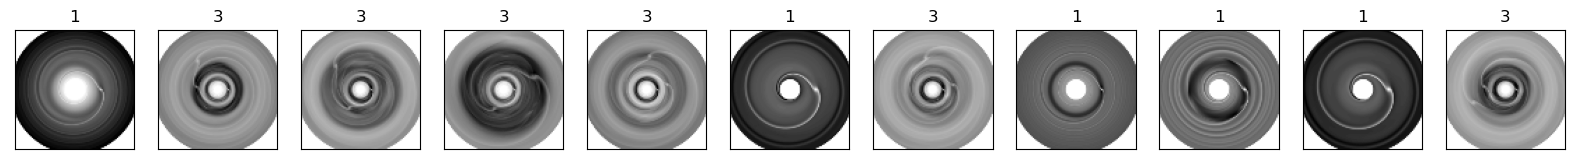

In [35]:
# Displaying 120th to 129th image data

n_col=11

fig, axes = plt.subplots(ncols=n_col, sharex=False,
    sharey=True, figsize=(20, 7))
counter = 0

for i in range(120, 120 + n_col):
    axes[counter].set_title(y_train[i])
    axes[counter].imshow(X_train[i], cmap='gray')
    axes[counter].get_xaxis().set_visible(False)
    axes[counter].get_yaxis().set_visible(False)
    counter += 1
    
plt.show()


In [36]:
X_train_new = X_train
X_test_new = X_test

In [37]:
# Defining some variables

img_height   = X_train_new.shape[1]    							# usually worked with 64
img_width    = X_train_new.shape[2]    							# usually worked with 64
num_channels = X_train_new.shape[3]    							# 1
input_shape =  (img_height, img_width, num_channels)   			# (64,64,1)


In [38]:

latent_dim = 4    												# Dimension of the latent space


In [39]:
# Constructing encoder

encoder_input = Input(shape=input_shape)

encoder_conv = Conv2D(filters=32, kernel_size=3, strides=2, 
                padding='same', activation='relu')(encoder_input)
encoder_conv = Conv2D(filters=64, kernel_size=3, strides=2, 
                padding='same', activation='relu')(encoder_input)
#encoder_conv = Conv2D(filters=128, kernel_size=3, strides=2, 
#                padding='same', activation='relu')(encoder_input)

encoder = Flatten()(encoder_conv)

mu = Dense(latent_dim)(encoder)
sigma = Dense(latent_dim)(encoder)

latent_space = Lambda(compute_latent, output_shape=(latent_dim,))([mu, sigma])


In [40]:
# Take the convolution shape to be used in the decoder
conv_shape = K.int_shape(encoder_conv)


In [41]:
# Constructing decoder

decoder_input = Input(shape=(latent_dim,))
decoder = Dense(conv_shape[1]*conv_shape[2]*conv_shape[3], activation='relu')(decoder_input)
decoder = Reshape((conv_shape[1], conv_shape[2], conv_shape[3]))(decoder)

#decoder_conv = Conv2DTranspose(filters=128, kernel_size=3, strides=2, 
#                           padding='same', activation='relu')(decoder)
decoder_conv = Conv2DTranspose(filters=64, kernel_size=3, strides=2, 
                           padding='same', activation='relu')(decoder)
decoder_conv = Conv2DTranspose(filters=32, kernel_size=3, strides=2, 
                           padding='same', activation='relu')(decoder)

decoder_conv =  Conv2DTranspose(filters=num_channels, kernel_size=3, 
                          padding='same', activation='sigmoid')(decoder_conv)


In [42]:
# Actually build encoder, decoder and the entire VAE

encoder = Model(encoder_input, latent_space)
decoder = Model(decoder_input, decoder_conv)
vae = Model(encoder_input, decoder(encoder(encoder_input)))


In [43]:
# Compile the model using KL loss

vae.compile(optimizer='adam', loss=kl_reconstruction_loss)


### Training the VAE Network

In [44]:
# Training VAE

history = vae.fit(x=X_train_new, y=X_train_new, epochs=50, batch_size=bs, validation_data=(X_test_new,X_test_new))


Train on 1145 samples, validate on 382 samples
Epoch 1/50


2023-05-24 19:54:15.273006: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-24 19:54:15.273045: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-05-24 19:54:15.287616: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2023-05-24 19:54:15.298808: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-05-24 19:54:15.307245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-24 19:54:15.449681: I tensorflow/core/grappler/optimizers/custom_graph

1145/1145 [==============================] - ETA: 0s - loss: 5121.9428

/opt/miniconda3/envs/tensorflow2/lib/python3.9/site-packages/keras/engine/training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2023-05-24 19:54:18.277926: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1145/1145 [==============================] - 3s 3ms/sample - loss: 5121.9428 - val_loss: 5037.9346
Epoch 2/50
1145/1145 [==============================] - 3s 2ms/sample - loss: 4851.6843 - val_loss: 4571.6536
Epoch 3/50
1145/1145 [==============================] - 2s 2ms/sample - loss: 4440.7052 - val_loss: 4214.9912
Epoch 4/50
1145/1145 [==============================] - 3s 2ms/sample - loss: 4129.1328 - val_loss: 3929.0182
Epoch 5/50
1145/1145 [==============================] - 3s 2ms/sample - loss: 3887.0168 - val_loss: 3755.3090
Epoch 6/50
1145/1145 [==============================] - 3s 2ms/sample - loss: 3774.6115 - val_loss: 3698.3462
Epoch 7/50
1145/1145 [==============================] - 3s 2ms/sample - loss: 3731.5646 - val_loss: 3666.8953
Epoch 8/50
1145/1145 [==============================] - 2s 2ms/sample - loss: 3702.8879 - val_loss: 3648.0676
Epoch 9/50
1145/1145 [==============================] - 2s 2ms/sample - loss: 3683.7206 - val_loss: 3627.4035
Epoch 10/50
1145/1145

### Plotting the loss

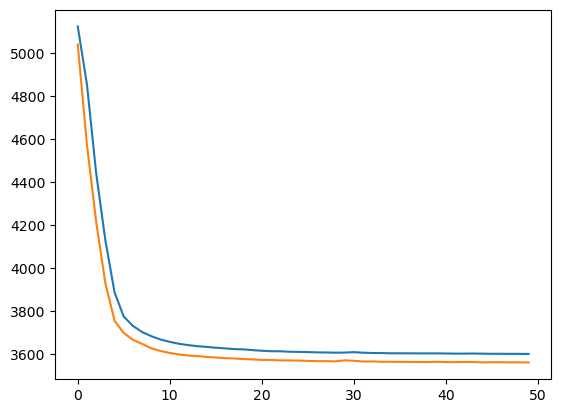

In [46]:
# Plotting loss value decrease

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


In [47]:
# Transforming images to points in latent space using encoder

encoded = encoder.predict(X_train_new)


/opt/miniconda3/envs/tensorflow2/lib/python3.9/site-packages/keras/engine/training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2023-05-24 19:56:27.745701: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [50]:
#print(encoded[-2:])
#print(encoded[0,:])

## Viewing the images in latent space from various perspectives

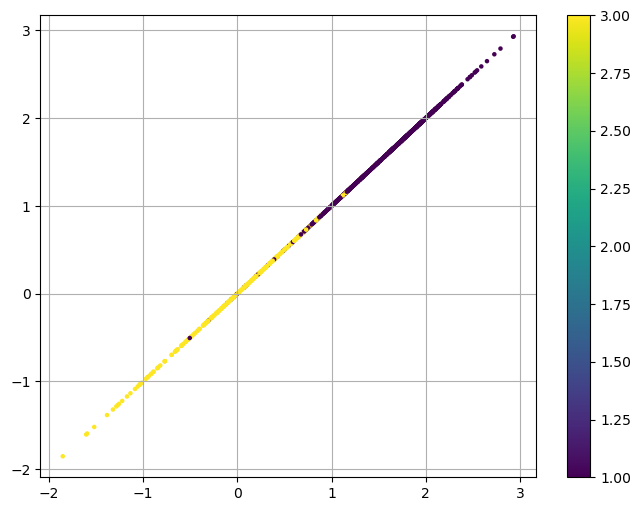

In [64]:
# Displaying images in latent space
import time
import sys
from IPython import display

## If we are dealing with 'n' latent variables, then we will have n x n number of latent perspectives to view in 2D
for i in range(latent_dim):
    for j in range(latent_dim):
        plt.figure(figsize=(8,6))
        plt.scatter(encoded[:,i], encoded[:,j], 
                    s=5, 									# Setting the type of the marker
                    #marker="s",
                    c=y_train, 
                    cmap='viridis')
        plt.colorbar()
        plt.grid()
        plt.show()
        display.clear_output(wait=True)
        #print (i,j)
        time.sleep(0.2) 										# Setting the speed of the playback

In [58]:
# To view the images of the scatter plot (a work in progress)
# Latent dimension = 2
# Starting point=(x1,y1) 
# End point=(x2,y2)


# display_image_sequence(x1,y1,x2,y2, no_of_images)

End of code!